<h1><center>Multi-armed Brandit</center></h1>

<img src="pics/multiarmedbandit.jpg" width="400" height="400" align="center"/>

### Definition
In probability theory and machine learning, the multi-armed bandit problem (sometimes called the K- or N-armed bandit problem) is a problem in which a fixed limited set of resources must be allocated between competing (alternative) choices in a way that maximizes their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better understood as time passes or by allocating resources to the choice. This is a classic reinforcement learning problem that exemplifies the <b> exploration–exploitation tradeoff </b> dilemma.<br>
Reference: https://en.wikipedia.org/wiki/Multi-armed_bandit

It's also related to decision making and optimization. Comparing to AB testing (which is 100% exploration), multi-armed brandit jumps back and force discretely between exploration to exploitation based on decision rules. It is more efficient than AB testing, you don't need to wait until the final results. Some people call it "earn while learn".<br>

Like AB testing, its basic assumpotions is that the hidden targets' distribution don't change over the all process. However, I personally believe it's better than AB testing because once the distribution changes, the multi-armed brandit will still redirect and search for the optimal choice.

In [ ]:
import random
import numpy as np
import pandas as pd
import math

## Epsilon Greedy Method

In [131]:
class epsilon_greedy:
    '''Epsilon Greedu Method'''
    def __init__(self,counts, values,epsilon):
        """
        counts: number of selection for each choice
        values: reward for each choice
        n_arms: number of choices
        epsilon: exploration-exploitation param
        """
        self.counts = counts 
        self.values = values 
        self.n_arms = None
        self.epsilon = epsilon
        return
    
    # Initialise k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        self.n_arms = n_arms
        return

    # select rules
    def select_arm(self):
        p = np.random.random()
        if p < self.epsilon:
            idx = np.random.choice(self.n_arms)
        else:
            idx = np.argmax(self.values)
        return idx
    
    # Choose to update chosen arm and reward
    def update(self, chosen_arm, reward):
        # update counts pulled for chosen arm
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        # Update average/mean value/reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [132]:
def get_result(true_probs,choosed_arm):
    """
    return machine result 
    """
    prob = true_probs[choosed_arm]
    if random.random() > prob:
        return 0.0
    else:
        return 1.0

In [156]:
def test_main(true_probs,algo,num_iter):
    """
    simulation main function
    """
    loss = []
    print(algo.values)
    for i in range(num_iter):
        chosen_arm = algo.select_arm()
        reward = get_result(true_probs,chosen_arm)
        algo.update(chosen_arm,reward)
        print(algo.values)
        loss.append(mean_squared_error(true_probs,algo.values))
    return loss

In [157]:
epsilon_greedy_test = epsilon_greedy([],[],0.2)
epsilon_greedy_test.initialize(5)
true_probs = [0.1,0.3,0.8,0.4,0.7]
loss_record_epsilon = test_main(true_probs,epsilon_greedy_test,200)

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0

## Upper Confidence Bound Socket

In [144]:
class UCBSocket:
    """
    Upper Confidence Bound Socket Method
    """
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
        self.n_arms = None
        return

    # Initialise k number of arms
    def initialize(self, n_arms):
        self.counts = [0.01 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        self.n_arms = n_arms
        return

    def select_arm(self):
        chosen_arm = np.argmax(self.values + 
                               np.sqrt(2*(np.log(sum(self.counts))) / self.counts))
        return chosen_arm

    # Choose to update chosen arm and reward
    def update(self, chosen_arm, reward):
        # update counts pulled for chosen arm
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        # Update average/mean value/reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [159]:
ucb_test = UCBSocket([],[])
ucb_test.initialize(5)
true_probs = [0.1,0.3,0.8,0.4,0.7]
loss_record_ucb = test_main(true_probs,ucb_test,200)

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.9900990099009901, 0.0, 0.0]
[0.0, 0.0, 0.9900990099009901, 0.9900990099009901, 0.0]
[0.0, 0.0, 0.9900990099009901, 0.9900990099009901, 0.9900990099009901]
[0.0, 0.0, 0.9950248756218906, 0.9900990099009901, 0.9900990099009901]
[0.0, 0.0, 0.9950248756218906, 0.9950248756218906, 0.9900990099009901]
[0.0, 0.0, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906]
[0.0, 0.0, 0.9966777408637872, 0.9950248756218906, 0.9950248756218906]
[0.0, 0.0, 0.9966777408637872, 0.6644518272425248, 0.9950248756218906]
[0.0, 0.0, 0.9966777408637872, 0.6644518272425248, 0.9966777408637872]
[0.0, 0.0, 0.997506234413965, 0.6644518272425248, 0.9966777408637872]
[0.0, 0.0, 0.997506234413965, 0.6644518272425248, 0.997506234413965]
[0.49751243781094534, 0.0, 0.997506234413965, 0.6644518272425248, 0.997506234413965]
[0.49751243781094534, 0.0, 0.997506234413965, 0.6644518272425248, 0.997506234413965]
[0.4975124378109453

<ipython-input-144-d8a7f3c9477c>:17: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(2*(np.log(sum(self.counts))) / self.counts))


## Softmax Bandit

In [106]:
# reference: https://medium.com/analytics-vidhya/multi-armed-bandit-analysis-of-softmax-algorithm-e1fa4cb0c422
class Softmax_brandit:
    """
    Softmax Brandit
    """
    def __init__(self,counts, values):
        self.counts = counts 
        self.values = values 
        self.n_arms = None
        return
    
    # Initialise k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        self.n_arms = n_arms
        return
    
    def select_arm(self):
        # Calculate Softmax probabilities based on each round
        z = sum([math.exp(v) for v in self.values])
        probs = [math.exp(v) / z for v in self.values]
        # Use categorical_draw to pick arm
        return random.choices(list(range(self.n_arms)),weights = probs)[0]
    
    # Choose to update chosen arm and reward
    def update(self, chosen_arm, reward):
        # update counts pulled for chosen arm
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        # Update average/mean value/reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [114]:
def test_main(true_probs,Softmax_brandit_test,num_iter):
    print(Softmax_brandit_test.values)
    for i in range(num_iter):
        chosen_arm = Softmax_brandit_test.select_arm()
        reward = get_result(true_probs,chosen_arm)
        Softmax_brandit_test.update(chosen_arm,reward)
        print(Softmax_brandit_test.values)

In [161]:
Softmax_brandit_test = Softmax_brandit([],[])
Softmax_brandit_test.initialize(5)
true_probs = [0.1,0.3,0.8,0.4,0.7]
loss_record_softmax = test_main(true_probs,Softmax_brandit_test,200)

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0, 0.75]
[0.0, 0.0, 1.0, 0.0, 0.75]
[0.0, 0.0, 1.0, 0.3333333333333333, 0.75]
[0.0, 0.0, 1.0, 0.3333333333333333, 0.75]
[0.0, 0.0, 1.0, 0.25, 0.75]
[0.0, 0.0, 1.0, 0.25, 0.75]
[0.0, 0.0, 1.0, 0.4, 0.75]
[0.0, 0.0, 1.0, 0.4, 0.75]
[0.0, 0.0, 1.0, 0.4, 0.6000000000000001]
[0.0, 0.0, 1.0, 0.4, 0.6000000000000001]
[0.0, 0.0, 0.875, 0.4, 0.6000000000000001]
[0.0, 0.0, 0.875, 0.4, 0.6666666666666667]
[0.0, 0.0, 0.875, 0.4, 0.5714285714285715]
[0.0, 0.0, 0.8888888888888888, 0.4, 0.5714285714285715]
[0.0, 0.0, 0.8888888888888888, 0.4, 0.5714285714285715]
[0.0, 0.0, 0.8888888888888888, 0.4, 0.6250000000000001]
[0.0, 0.0

## Comaring Simulation Result

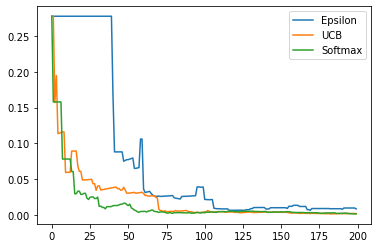

In [162]:
plt.plot(range(200), loss_record_epsilon, label = "Epsilon")
plt.plot(range(200), loss_record_ucb, label = "UCB")
plt.plot(range(200), loss_record_softmax, label = "Softmax")
plt.legend()
plt.show()

Softmax is the best one for this particular simulation, converge fast with low loss score.

# Useful Links

1. https://cxl.com/blog/bandit-tests/
2. https://vwo.com/blog/multi-armed-bandit-algorithm/